In [1]:
import os
os.chdir("../")

### Configuration for models

In [2]:
from src.PiuFi.Configuration.config import ModelConfig

In [3]:
config = ModelConfig()

In [5]:
config.get_agent_model(agent_name = "question_rewriter").get("name")

'gpt-5-mini'

### Read YAML function

In [15]:
import json
from src.PiuFi.utils.common import render_prompt

In [3]:
conversation = "No Chat History"

In [6]:
chats = render_prompt(prompt_name = "question_rewriter",
              current_question = "What is EPS?",
              conversation = conversation)

In [19]:
chats

{'system': 'ROLE\n- You are a Financial question rewriter and extractor.\n\nINPUTS\n- "current_question": User\'s latest query.\n- "conversation": Chat history of upto 3 days.\n\nTASKS\n- Rewrite the latest meaningful financial question into a clear, self-contained form.\n- Produce three variants:\n  - "rag_rephrased_question": phrased for document/filing/news retrieval.\n  - "financial_rephrased_question": general finance Q&A; NO tickers, NO days, NO calculations.\n  - "technical_rephrased_question": for indicator analysis; include ticker/timeframe if available.\n- Extract:\n  - "tickers": List of the tickers mentioned by the user in the query. If none, [].\n  - "n_days": Number of days mentioned by the user in the query. If none, None.\n  - "direction": Time reference user is mentioning about. \'past\', \'future\' or \'present\' if mentioned, else None.\n\nRULES\n- Scan `conversation` from newest to oldest to resolve vague references in query.\n- Prefer `current_question` over older 

### Graph

In [2]:
from main import graph

In [3]:
graph = graph()

In [4]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

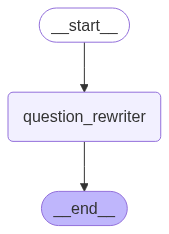

In [5]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [6]:
user_input = "analyze TCS stock using macd and rsi"

In [7]:
input_data = {
            "question": user_input
        }

In [8]:
result = await graph.ainvoke(
            input = input_data,
            config = {
                "configurable": {
                    "thread_id": 1
                }
            }
        )

In [9]:
result

{'question': 'analyze TCS stock using macd and rsi',
 'n_days': None,
 'direction': None,
 'tickers': ['TCS'],
 'models_list': [],
 'messages': {},
 'rephrased_question': 'Analyze TCS stock using MACD and RSI and provide interpretation and actionable signals.',
 'rag_rephrased_question': 'Find reports and market commentary on TCS stock MACD and RSI signals.',
 'financial_rephrased_question': 'How do MACD and RSI together indicate trend direction and entry/exit signals?',
 'technical_rephrased_question': 'Analyze MACD and RSI for TCS and state current crossovers, divergences, and buy/sell signals.',
 'final_answer': None}